# Building the Training Loop for a Neural Network


## Step 1: Setting Up the Environment


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# For reproducibility
torch.manual_seed(42)

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Sample data setup
# Inputs and targets are initially on CPU. They will be moved to the 'device' batch-wise in the training loop.
inputs = torch.randn(100, 10)  # 100 samples, 10 features
targets = torch.randn(100, 1) # 100 samples, 1 target value

dataset = TensorDataset(inputs, targets)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

print("Environment setup complete. DataLoader is ready.")

Using device: cpu
Environment setup complete. DataLoader is ready.


## Step 2: Configuring the Neural Network


In [ ]:
class SimpleNetwork(nn.Module):
    def __init__(self):
        super(SimpleNetwork, self).__init__()
        # Define layers:
        # Input layer (10 features) to hidden layer (5 neurons)
        self.layer1 = nn.Linear(10, 5)
        # Activation function
        self.relu = nn.ReLU()
        # Hidden layer (5 neurons) to output layer (1 neuron)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x):
        # Define the forward pass:
        # Pass input through layer1, then ReLU activation, then layer2
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# Instantiate the model and move it to selected device
model = SimpleNetwork().to(device)
print("Neural network configured and moved to device.")
print(model)

Neural network configured and moved to device.
SimpleNetwork(
  (layer1): Linear(in_features=10, out_features=5, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)


## Step 3: Initializing Optimizer and Loss Function


In [ ]:
# Loss function
criterion = nn.MSELoss()

# Optimizer
# model.parameters() provides all trainable parameters of the model to the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

print("Optimizer and loss function initialized.")

Optimizer and loss function initialized.


## Step 4: Constructing the Training Loop


In [ ]:
num_epochs = 20
epoch_losses = []  # To store average loss per epoch for later evaluation/plotting

print(f"Starting training for {num_epochs} epochs...")

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode (important for layers like Dropout, BatchNorm)
    current_epoch_loss = 0.0
    num_batches = 0

    for batch_inputs, batch_targets in dataloader:
        # Move batch data to the same device as the model
        batch_inputs = batch_inputs.to(device)
        batch_targets = batch_targets.to(device)

        # 1. Forward pass: Compute predicted outputs by passing inputs to the model
        outputs = model(batch_inputs)

        # 2. Calculate loss
        loss = criterion(outputs, batch_targets)

        # 3. Backward pass and optimization:
        # Zero gradients before backward pass to prevent accumulation
        optimizer.zero_grad()
        # Compute gradients of the loss with respect to model parameters
        loss.backward()
        # Update model parameters
        optimizer.step()

        current_epoch_loss += loss.item()  # Accumulate loss for the current epoch
        num_batches += 1

    average_epoch_loss = current_epoch_loss / num_batches
    epoch_losses.append(average_epoch_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_epoch_loss:.4f}')

print("\nTraining complete.")

Starting training for 20 epochs...
Epoch [1/20], Average Loss: 1.2611
Epoch [2/20], Average Loss: 1.1741
Epoch [3/20], Average Loss: 1.1209
Epoch [4/20], Average Loss: 1.0895
Epoch [5/20], Average Loss: 1.0669
Epoch [6/20], Average Loss: 1.0530
Epoch [7/20], Average Loss: 1.0433
Epoch [8/20], Average Loss: 1.0362
Epoch [9/20], Average Loss: 1.0300
Epoch [10/20], Average Loss: 1.0252
Epoch [11/20], Average Loss: 1.0231
Epoch [12/20], Average Loss: 1.0177
Epoch [13/20], Average Loss: 1.0157
Epoch [14/20], Average Loss: 1.0122
Epoch [15/20], Average Loss: 1.0100
Epoch [16/20], Average Loss: 1.0057
Epoch [17/20], Average Loss: 1.0044
Epoch [18/20], Average Loss: 1.0023
Epoch [19/20], Average Loss: 0.9997
Epoch [20/20], Average Loss: 0.9989

Training complete.


## Step 5: Evaluating Results



--- Evaluation ---
Stored average losses per epoch:
Epoch 1: 1.2611
Epoch 2: 1.1741
Epoch 3: 1.1209
Epoch 4: 1.0895
Epoch 5: 1.0669
Epoch 6: 1.0530
Epoch 7: 1.0433
Epoch 8: 1.0362
Epoch 9: 1.0300
Epoch 10: 1.0252
Epoch 11: 1.0231
Epoch 12: 1.0177
Epoch 13: 1.0157
Epoch 14: 1.0122
Epoch 15: 1.0100
Epoch 16: 1.0057
Epoch 17: 1.0044
Epoch 18: 1.0023
Epoch 19: 0.9997
Epoch 20: 0.9989


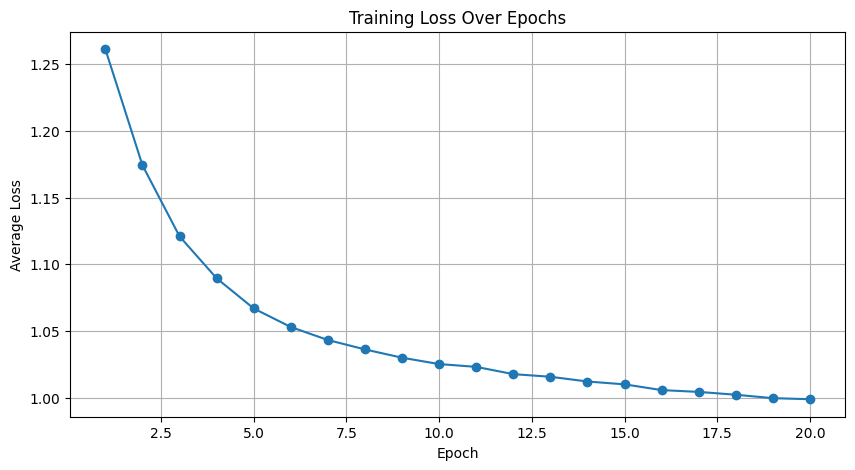

In [ ]:
print("\n--- Evaluation ---")
print("Stored average losses per epoch:")
for i, loss_val in enumerate(epoch_losses):
    print(f"Epoch {i+1}: {loss_val:.4f}")

# The 'epoch_losses' list can now be used for plotting
# For example, using matplotlib:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()